# Этап 1: знакомство с данными и EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')
tags = pd.read_csv('tags.csv')
book_tags = pd.read_csv('book_tags.csv')

print("ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print(f"Ratings: {ratings.shape}")
print(f"Books: {books.shape}")
print(f"Tags: {tags.shape}")
print(f"Book_tags: {book_tags.shape}")

# Просмотр первых строк каждого датасета
print("ПЕРВЫЕ СТРОКИ ДАННЫХ")
print("Ratings:")
print(ratings.head())
print("\nBooks:")
print(books[['book_id', 'title', 'authors', 'average_rating']].head())
print("\nTags:")
print(tags.head())
print("\nBook_tags:")
print(book_tags.head())
print("\nTo_read:")


ОСНОВНАЯ ИНФОРМАЦИЯ О ДАННЫХ
Ratings: (5976479, 3)
Books: (10000, 23)
Tags: (34252, 2)
Book_tags: (999912, 3)
ПЕРВЫЕ СТРОКИ ДАННЫХ
Ratings:
   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3

Books:
   book_id                                              title  \
0        1            The Hunger Games (The Hunger Games, #1)   
1        2  Harry Potter and the Sorcerer's Stone (Harry P...   
2        3                            Twilight (Twilight, #1)   
3        4                              To Kill a Mockingbird   
4        5                                   The Great Gatsby   

                       authors  average_rating  
0              Suzanne Collins            4.34  
1  J.K. Rowling, Mary GrandPré            4.44  
2              Stephenie Meyer            3.57  
3                   Harper Lee            4.25  
4          F. Scott Fitzgerald            3.89  

Средняя оценка: 3.92
Медианная оценка: 4.00
Общее количество оценок: 5976479
Количество уникальных пользователей: 53424
Количество уникальных книг: 10000
Процент количества оценок больше или равно 4: 68.97223264734971


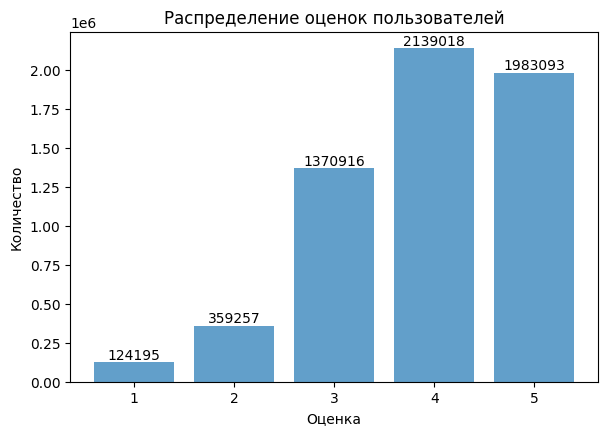

In [2]:
# 1. Распределение оценок
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
rating_dist = ratings['rating'].value_counts()
plt.bar(rating_dist.index, rating_dist.values,  alpha=0.7)
plt.title('Распределение оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Количество')
for i, v in enumerate(rating_dist.values):
    plt.text(rating_dist.index[i], v, str(v), ha='center', va='bottom')

# Статистика по оценкам
print(f"Средняя оценка: {ratings['rating'].mean():.2f}")
print(f"Медианная оценка: {ratings['rating'].median():.2f}")
print(f"Общее количество оценок: {len(ratings)}")
print(f"Количество уникальных пользователей: {ratings['user_id'].nunique()}")
print(f"Количество уникальных книг: {ratings['book_id'].nunique()}")
print(f"Процент количества оценок больше или равно 4: {100/len(ratings) * len(ratings[ratings['rating'] >= 4])}")



### Есть ли смещение в сторону высоких оценок?
Да, видим что медианная оценка 4, и 69% оценок >= 4

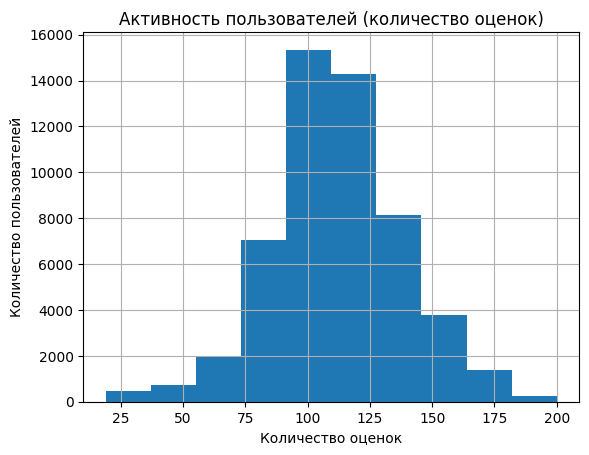

Среднее количество оценок на пользователя: 111.87
Медианное количество оценок на пользователя: 111.00
Максимальное количество оценок у пользователя: 200
Минимальное количество оценок у пользователя: 19

Пользователи с ≤5 оценками (проблема холодного старта): 0 (0.0%)
Активные пользователи (>50 оценок): 52485 (98.2%)


In [3]:
# 2. Анализ активности пользователей

user_activity = ratings.groupby('user_id')['rating'].count()
countUsers = len(user_activity)

# График активности пользователей
user_activity.hist()
plt.title('Активность пользователей (количество оценок)')
plt.xlabel('Количество оценок')
plt.ylabel('Количество пользователей')
plt.show()

# Статистика по активности пользователей
print(f"Среднее количество оценок на пользователя: {user_activity.mean():.2f}")
print(f"Медианное количество оценок на пользователя: {user_activity.median():.2f}")
print(f"Максимальное количество оценок у пользователя: {user_activity.max()}")
print(f"Минимальное количество оценок у пользователя: {user_activity.min()}")

# Анализ "холодных" пользователей
cold_users = (user_activity <= 5).sum()
active_users = (user_activity > 50).sum()
print(f"\nПользователи с ≤5 оценками (проблема холодного старта): {cold_users} ({cold_users/len(user_activity)*100:.1f}%)")
print(f"Активные пользователи (>50 оценок): {active_users} ({active_users/len(user_activity)*100:.1f}%)")

Среднее количество оценок на книгу: 597.65
Медианное количество оценок на книгу: 248.00
Максимальное количество оценок у книги: 22806
Минимальное количество оценок у книги: 8

Книги с ≤10 оценками (длинный хвост): 1 (0.0%)
Популярные книги (>100 оценок): 9484 (94.8%)

Топ-10 самых популярных книг (по количеству оценок):
1. The Hunger Games (The Hunger Games, #1) - 22806 оценок - 2008 год
2. Harry Potter and the Sorcerer's Stone (Harry Potter, #1) - 21850 оценок - 1997 год
3. To Kill a Mockingbird - 19088 оценок - 1960 год
4. Twilight (Twilight, #1) - 16931 оценок - 2005 год
5. The Great Gatsby - 16604 оценок - 1925 год
6. Catching Fire (The Hunger Games, #2) - 16549 оценок - 2009 год
7. Mockingjay (The Hunger Games, #3) - 15953 оценок - 2010 год
8. Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) - 15855 оценок - 1999 год
9. Harry Potter and the Chamber of Secrets (Harry Potter, #2) - 15657 оценок - 1998 год
10. The Hobbit - 15558 оценок - 1937 год


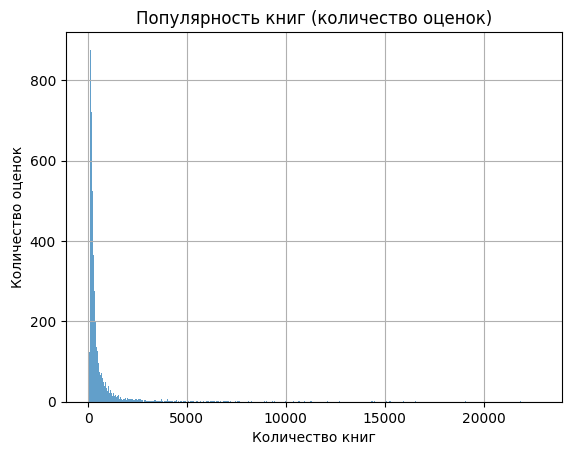

In [4]:
# Анализ популярности книг
book_popularity = ratings.groupby('book_id')['rating'].count()

# График популярности книг
book_popularity.hist(bins=1000, alpha=0.7)
plt.title('Популярность книг (количество оценок)')
plt.xlabel('Количество книг')
plt.ylabel('Количество оценок')

# Статистика по популярности книг
print(f"Среднее количество оценок на книгу: {book_popularity.mean():.2f}")
print(f"Медианное количество оценок на книгу: {book_popularity.median():.2f}")
print(f"Максимальное количество оценок у книги: {book_popularity.max()}")
print(f"Минимальное количество оценок у книги: {book_popularity.min()}")

# Анализ "длинного хвоста"
tail_books = (book_popularity <= 10).sum()
popular_books = (book_popularity > 100).sum()
print(f"\nКниги с ≤10 оценками (длинный хвост): {tail_books} ({tail_books/len(book_popularity)*100:.1f}%)")
print(f"Популярные книги (>100 оценок): {popular_books} ({popular_books/len(book_popularity)*100:.1f}%)")

# Топ-10 самых популярных книг
top_books = book_popularity.sort_values(ascending=False).head(10)
book_indexed = books.set_index('book_id');
print(f"\nТоп-10 самых популярных книг (по количеству оценок):")
for i, (book_id, count) in enumerate(top_books.items(), 1):
    book = book_indexed.loc[book_id]
    print(f"{i}. {book['title']} - {count} оценок - {book['original_publication_year']:.0f} год")


Видим проблему "длинного хвоста" - почти все оценки у самых популярных книг, а остальные книги почти никто не оценивает

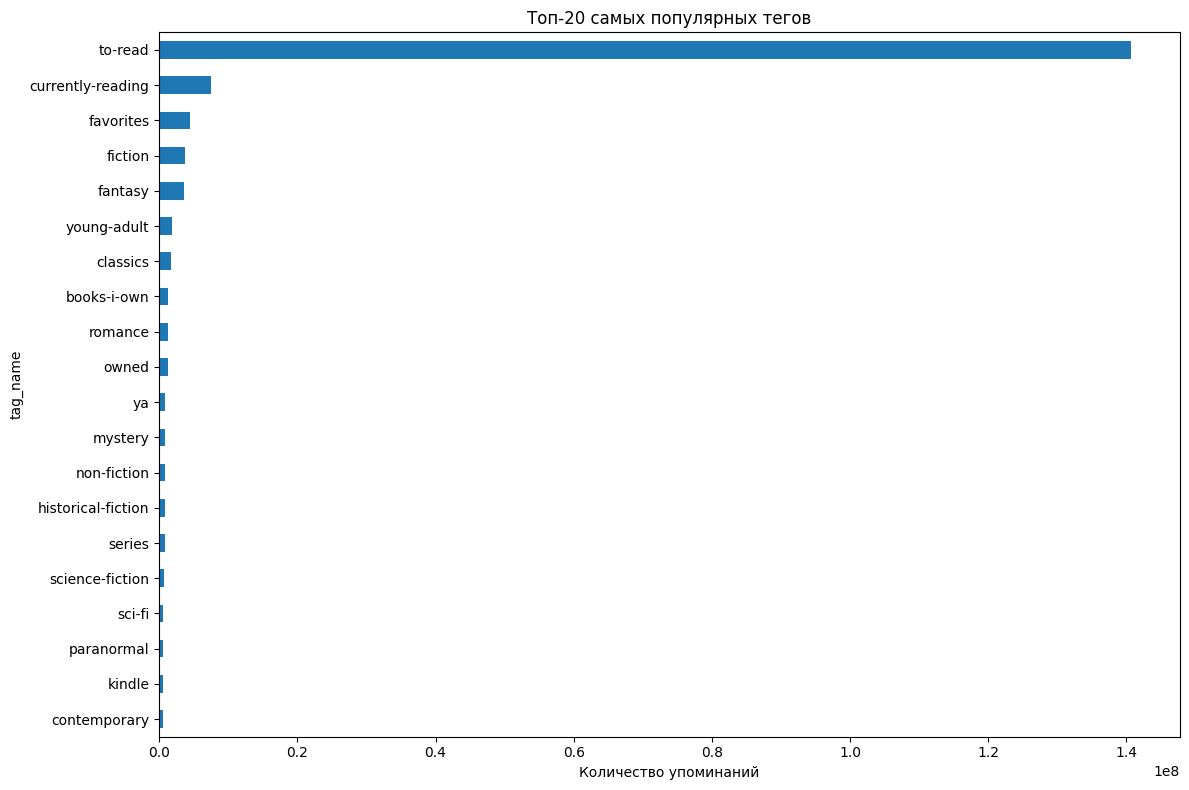

Всего уникальных тегов: 34252
Всего связей книга-тег: 999912
Среднее количество тегов на книгу: 99.99


<Figure size 640x480 with 0 Axes>

In [5]:
# 4. Визуализация самых частых тегов
# Объединяем book_tags с tags для получения названий тегов
book_tags_with_names = book_tags.merge(tags, on='tag_id', how='inner')

# Считаем самые популярные теги
top_tags = book_tags_with_names.groupby('tag_name')['count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
top_tags.sort_values().plot(kind='barh')
plt.title('Топ-20 самых популярных тегов')
plt.xlabel('Количество упоминаний')
plt.tight_layout()
plt.show()

# Статистика по тегам
print(f"Всего уникальных тегов: {tags['tag_id'].nunique()}")
print(f"Всего связей книга-тег: {len(book_tags)}")
print(f"Среднее количество тегов на книгу: {book_tags.groupby('goodreads_book_id')['tag_id'].count().mean():.2f}")

plt.tight_layout()
plt.show()

### Какие основные проблемы данных (разреженность, смещение популярности) видны уже на этапе EDA?
1. Видна разреженность данных - большинство оценок у популярных книг, новые книги оценивают меньше.
2. Популярность смещена в строну популярных старых книг.

# Этап 2: базовые и контентные модели

In [6]:
#Неперсонализированная модель Popularity

class PopularityRecommender:
    
    def __init__(self,books, min_count_ratings=10):
        self.min_count_ratings = min_count_ratings
        self.popular_books = None
        self.books=books
        
    def fit(self, ratings):
        # Вычисляем средний рейтинг с минимальным количеством оценок
        book_stats = ratings.groupby('book_id').agg({
            'rating': ['count', 'mean']
        }).round(2)
        book_stats.columns = ['count', 'mean_rating']
        # Фильтруем по минимальному количеству оценок
        qualified_books = book_stats[book_stats['count'] >= self.min_count_ratings]
        # Сортируем по среднему рейтингу
        self.popular_books = qualified_books.sort_values('mean_rating', ascending=False)
        # Добавляем информацию о книгах
        self.popular_books = self.popular_books.merge(
            self.books[['book_id', 'original_title','title']], 
            on='book_id'
        )
        
    def recommend(self, n=10):
        return self.popular_books.head(n)

# Инициализация и обучение модели популярности
pop_model = PopularityRecommender(books=books,min_count_ratings=7000)
pop_model.fit(ratings)
print("Топ-10 популярных книг:")
display(pop_model.recommend(10))


Топ-10 популярных книг:


,book_id,count,mean_rating,original_title,title
0,25,15304,4.53,Harry Potter and the Deathly Hallows,Harry Potter and the Deathly Hallows (Harry Po...
1,27,15081,4.44,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...
2,24,15523,4.43,Harry Potter and the Goblet of Fire,Harry Potter and the Goblet of Fire (Harry Pot...
3,18,15855,4.42,Harry Potter and the Prisoner of Azkaban,Harry Potter and the Prisoner of Azkaban (Harr...
4,31,12727,4.38,The Help,The Help
5,21,15258,4.36,Harry Potter and the Order of the Phoenix,Harry Potter and the Order of the Phoenix (Har...
6,2,21850,4.35,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...
7,39,10692,4.34,A Game of Thrones,"A Game of Thrones (A Song of Ice and Fire, #1)"
8,85,7002,4.34,The Giving Tree,The Giving Tree
9,4,19088,4.33,To Kill a Mockingbird,To Kill a Mockingbird


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class ContentBasedRecommender:

    def __init__(self, book_tags, tags):
        self.tfidf_matrix = None
        self.vectorizer = None
        self.book_ids = None
        self.book_tags = book_tags
        self.tags = tags
        
    def prepare_book_profiles(self, books):
        # Создаем текстовые профили для книг
        book_profiles = []
        
        # Объединяем теги с названиями, группируем по id связи с книгой и объединяем имена тегов через пробел для создания профиля
        book_full_tags = self.book_tags.merge(self.tags, on='tag_id').groupby('goodreads_book_id').agg({'tag_name':' '.join})
        book_profiles = books.merge(book_full_tags,on='goodreads_book_id')
        book_profiles['original_title'] = book_profiles['original_title'].fillna(book_profiles['title'])
        book_profiles['profile'] = '' + book_profiles['original_title'] + ' ' + book_profiles['tag_name']
        return book_profiles[['profile','book_id']]
    
    def fit(self, books):
        # Подготавливаем профили
        book_profiles = self.prepare_book_profiles(books)

        # Векторизуем с помощью TF-IDF
        self.vectorizer = TfidfVectorizer(
            max_features=5000,
            stop_words='english',
            ngram_range=(1, 2)
        )
        
        self.tfidf_matrix = self.vectorizer.fit_transform(book_profiles['profile'])
        self.book_ids = book_profiles['book_id'].values
        
    def get_similar_books(self, book_id, n=5):
            
        # Находим индекс книги
        book_idx = np.where(self.book_ids == book_id)[0][0]

        # Вычисляем косинусную схожесть
        cosine_similarities = cosine_similarity(
            self.tfidf_matrix[book_idx:book_idx+1], 
            self.tfidf_matrix
        ).flatten()
        
        # Получаем индексы наиболее похожих книг (исключая саму книгу)
        similar_indexes = cosine_similarities.argsort()[::-1][1:n+1]

        similar_books = []
        
        # Индексируем книги для быстрого получения информации о книгах
        book_indexes = books.set_index('book_id')
        for idx in similar_indexes:
            similar_book_id = self.book_ids[idx]
            similarity_score = cosine_similarities[idx]
            
            # Получаем информацию о книге
            book_info = book_indexes.loc[similar_book_id]
            similar_books.append({
                'book_id': similar_book_id,
                'title': book_info['original_title'] if pd.notna(book_info['original_title']) else book_info['title'],
                'similarity': similarity_score
            })
        
        return pd.DataFrame(similar_books)

# Инициализация и обучение контентной модели
content_model = ContentBasedRecommender(book_tags, tags)
content_model.fit(books)

# Тестируем на примере
book = books.iloc[0]
print(f"Похожие книги на '{book['original_title']}':")
similar_books = content_model.get_similar_books(book['book_id'], 10)
print(similar_books[['title', 'similarity']])

Похожие книги на 'The Hunger Games':
                      title  similarity
0                Mockingjay    0.664519
1             Catching Fire    0.655622
2  The Hunger Games Box Set    0.643034
3                 Divergent    0.579086
4                   Matched    0.526855
5                  Pretties    0.524796
6           Monsters of Men    0.524053
7                  Starters    0.515236
8                  Specials    0.505998
9    The Ask and the Answer    0.504638


# Этап 3: коллаборативная фильтрация (Collaborative Filtering — CF)

In [9]:
import random

class ItemBasedCF:
    def __init__(self, k=5):
        self.k = k
        self.user_item_matrix = None
        self.similarity_matrix = None
        self.books_rated = None
         
    def fit(self, ratings):
        # Матрица пользователь-книга
        self.user_item_matrix = ratings.pivot_table(
            index='user_id', 
            columns='book_id', 
            values='rating'
        ).fillna(0)

        # Матрица схожести книг
        self.similarity_matrix = cosine_similarity(self.user_item_matrix.T)
        self.similarity_df = pd.DataFrame(
            self.similarity_matrix,
            index=self.user_item_matrix.columns,
            columns=self.user_item_matrix.columns
        )
        # Какие книги оценивал пользователь
        self.books_rated = ratings.groupby('user_id')['book_id'].apply(set)

    def predict_rating(self, user_id, book_id):
        if user_id not in self.user_item_matrix.index or book_id not in self.similarity_df.columns:
            return 0

        user_ratings = self.user_item_matrix.loc[user_id]
        book_similarities = self.similarity_df[book_id]
        rated_books = self.books_rated[user_id]

        valid_books = [b for b in rated_books if b != book_id and user_ratings[b] > 0]
        if not valid_books:
            return 0
        
        similar_ratings = [(book_similarities[b], user_ratings[b]) for b in valid_books]
        similar_ratings = sorted(similar_ratings, reverse=True)[:self.k]

        if not similar_ratings:
            return 0

        similarities, ratings = zip(*similar_ratings)
        weighted_sum = np.dot(similarities, ratings)
        sum_weights = np.sum(np.abs(similarities))
        return round(weighted_sum / sum_weights if sum_weights > 0 else 0, 2)

    def recommend(self, user_id, all_books, k=10, candidate_size=1000):
        """Рекомендует top-k книг для пользователя"""
        if user_id not in self.user_item_matrix.index:
            return []
        
        rated = self.books_rated[user_id]
        candidates = list(set(all_books) - rated)

        # Случайный поднабор кандидатов (чтобы ускорить и не сравнивать со всеми)
        if len(candidates) > candidate_size:
            candidates = random.sample(candidates, candidate_size)

        preds = {b: self.predict_rating(user_id, b) for b in candidates}
        return sorted(preds, key=preds.get, reverse=True)[:k]

In [10]:
item_cf = ItemBasedCF(k=5)
item_cf.fit(ratings)
item_cf.predict_rating(1,1)

4.0

### В чём вычислительная сложность этого подхода? Как его можно оптимизировать для больших данных?
У этого подхода большая проблема в том, что его сложность растет пропорционально квадрату количества книг помноженное на количество пользователей, так как мы строим матрицу сравнения каждой книги с каждой по оценкам каждого пользователя. С каждым новым пользователем и каждой добавленной новой книгой строить матрицы становится все труднее. 
Оптимизация для больших данных: 
1. можно кешировать матрицы схожести, раз в какое-то время, чтобы вычисление их не происходило каждый раз.
2. можно ограничивать выборку книг, беря например книги того же жанра, года, автора.

### Этап 4: матричные разложения (Matrix Factorization)

In [13]:
# Разделяем данные на train и test

def split_right_train_test(rating_df,threshhold = 4, k = 5):
    # Выделим только вадные оценки
    v_rating = rating_df[rating_df['rating'] >= threshhold]
    # Отделяем пользователей у которых есть валидные оценки больше или равное нужному количеству
    res = v_rating.groupby('user_id').agg({'rating':'count'}).reset_index()

    valid_users = set(res[res['rating'] >= k * 2]['user_id'])

    valid_data = rating_df[rating_df['user_id'].isin(valid_users)]
    
     # Фильтруем записи с оценкой >= 4
    high_ratings = valid_data[valid_data['rating'] >= 4].copy()
    
    # Группируем по пользователям и для каждого выбираем k случайных записей с оценкой >= 4
    test_high_ratings = (
        high_ratings
        .groupby('user_id')
        .apply(lambda x: x.sample(n=k, random_state=42))
        .reset_index(drop=True, level=[0])# Убираем мульти индекс сохарняя оригинальные индексы записей
    )
    test_indixes = test_high_ratings.index
    
    return valid_data.drop(test_indixes).reset_index(drop=True), test_high_ratings.reset_index(drop=True)
    
    
    


In [17]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split

class MatrixFactorizationRecommender:

    def __init__(self, all_books_data, n_factors=50, n_epochs=20, lr=0.005, reg=0.02):
        self.n_factors = n_factors
        self.n_epochs = n_epochs
        self.lr = lr
        self.reg = reg
        # Инициализируем модель SVD
        self.model = SVD(
            n_factors=self.n_factors,
            n_epochs=self.n_epochs,
            lr_all=self.lr,
            reg_all=self.reg
        )
        self.ratings = None
        self.books = all_books_data


    def fit(self, train_set):
        data = self.prepare_data(train_set)
        self.model.fit(data.build_full_trainset())
        self.ratings = train_set

    def prepare_data(self, df_items):
        return Dataset.load_from_df(df_items[['user_id', 'book_id', 'rating']], reader)


    def predict_rating(self, user_id, book_id):
        try:
            prediction = self.model.predict(user_id, book_id)
            return prediction.est
        except:
            return 0

    def get_recommendations(self, user_id, n=5):
        # Получаем все книги, которые пользователь не оценивал
        rated_books = set(self.ratings[self.ratings['user_id'] == user_id]['book_id'])
        unrated_books = set(self.books['book_id']) - rated_books

        # Предсказываем рейтинги
        predictions = []
        for book_id in list(unrated_books):
            pred_rating = self.predict_rating(user_id, book_id)
            predictions.append((book_id, pred_rating))

        # Сортируем по предсказанному рейтингу
        predictions.sort(key=lambda x: x[1], reverse=True)

        # Добавляем информацию о книгах
        recommendations = []
        book_indexed = self.books.set_index('book_id')
        for book_id, rating in predictions[:n]:
            book_info = book_indexed.loc[book_id]
            recommendations.append({
                'book_id': book_id,
                'title': book_info['original_title'],
                'predicted_rating': rating
            })

        return pd.DataFrame(recommendations)

 # Подготавливаем данные для Surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['user_id', 'book_id', 'rating']], reader)

train_set, test_set = split_right_train_test(ratings)

mf_model = MatrixFactorizationRecommender(books, n_factors=20, n_epochs=10)
mf_model.fit(train_set)

predictions = mf_model.model.test(test_set[['user_id', 'book_id', 'rating']].values.tolist())
rmse = accuracy.rmse(predictions, verbose=False)

print(f"Оценка RMSE {rmse}")

test_user = ratings.loc[0]['user_id']
print(f"Рекомендации SVD для пользователя {test_user}:")
svd_recommendations = mf_model.get_recommendations(test_user, 5)
print(svd_recommendations[['title', 'predicted_rating']])


/var/folders/gt/8qzkfx097qv5qd1wscjc0rph0000gn/T/ipykernel_5821/3960063808.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_ratings


Оценка RMSE 0.7463318451739147
Рекомендации SVD для пользователя 1:
                                               title  predicted_rating
0  Attack of the Deranged Mutant Killer Monster S...          4.559447
1                     The Complete Calvin and Hobbes          4.485173
2                                    دیوان‎‎ [Dīvān]          4.481722
3  The Indispensable Calvin and Hobbes: A Calvin ...          4.434563
4  The Days Are Just Packed: A Calvin and Hobbes ...          4.419653


In [18]:
mf_model = MatrixFactorizationRecommender(books, n_factors=20, n_epochs=10)
mf_model.fit(train_set)
test_user = ratings.loc[0]['user_id']
print(f"Рекомендации SVD для пользователя {test_user}:")
svd_recommendations = mf_model.get_recommendations(test_user, 5)
print(svd_recommendations[['title', 'predicted_rating']])

Рекомендации SVD для пользователя 1:
                                               title  predicted_rating
0                                    دیوان‎‎ [Dīvān]          4.502438
1  The Indispensable Calvin and Hobbes: A Calvin ...          4.501099
2                     The Complete Calvin and Hobbes          4.461846
3  Attack of the Deranged Mutant Killer Monster S...          4.460632
4                                                NaN          4.441225


In [19]:
test_user = ratings.loc[0]['user_id']
print(f"Рекомендации SVD для пользователя {test_user}:")
svd_recommendations = mf_model.get_recommendations(test_user, 5)

Рекомендации SVD для пользователя 1:


### Этап 5: оценка и сравнение моделей

In [25]:

class RecommenderEvaluator:
    
    def __init__(self, test_ratings, threshold=4, k=5):
        self.test_set = test_ratings
        self.threshold = threshold
        self.k = k
        # Уникальные id пользователей
        self.users = set(test_ratings['user_id'])
        self.relevant_by_user = test_ratings[test_ratings['rating'] >= 4].groupby('user_id').agg({'book_id':set})


    def get_user_recomends(self, model,user):
        try:
            prediction = model.recommend(10)
            return prediction
        except:
            return 0
    
    def precision_recall_at_k_pop(self, model, k=5):
        pred = model.recommend(k)
        precisions = []
        recalls = []
        for u in self.users:
            if u in self.relevant_by_user.index:
                top_k_items = pred['book_id'].tolist()
                percision, recall = self.calc_percision_recall(u, top_k_items)
                precisions.append(percision)
                recalls.append(recall)

        return np.mean(precisions), np.mean(recalls)

    def calc_ndcg_pop(self,model, k=5):
        pred = model.recommend(k)
        all_ndcgs = []
        for u in self.users:
            if u in self.relevant_by_user.index:
                top_k_items = pred['book_id'].tolist()
                ndcg = self.calc_ndcg_at_k(u, top_k_items)
                all_ndcgs.append(ndcg)
        return np.mean(all_ndcgs)


        
    def calc_percision_recall(self, user_id, top_k_items):
        relevant_test_items = self.relevant_by_user.loc[user_id]['book_id']
        n_relevant_and_recommended = len(set(top_k_items) & set(relevant_test_items))
        return n_relevant_and_recommended / k, n_relevant_and_recommended / len(relevant_test_items)

    def calc_ndcg_at_k(self, user_id, top_k_items):
        relevant_test_items = self.relevant_by_user.loc[user_id]['book_id']
        dcg = 0.0
        for i, rec in enumerate(top_k_items):
            if rec in relevant_test_items:
                dcg += 1 / np.log2(i + 2)
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(relevant_test_items), len(top_k_items))))
        return dcg / idcg if idcg > 0 else 0


    def precision_recall_at_k_item_cf(self, model):
        test_group = self.test_set.groupby('user_id').agg({'book_id':set}).reset_index()
        precisions = []
        for index, test_gr_item in test_group.iterrows():
            results = []
            for i in test_gr_item['book_id']:
                results.append(model.predict_rating(test_gr_item['user_id'],i))
            filtered = [x for x in results if x >= 4]
            precisions.append(len(filtered)/k)
        return np.mean(precisions)



    def ndcg_at_k(self, recommended, relevant):
        dcg = 0.0
        for i, rec in enumerate(recommended):
            if rec in relevant:
                dcg += 1 / np.log2(i + 2)
        idcg = sum(1 / np.log2(i + 2) for i in range(min(len(relevant), len(recommended))))
        return dcg / idcg if idcg > 0 else 0

    # def get_dcg_at_k():

k = 5
train, test = split_right_train_test(ratings)

pop_model = PopularityRecommender(books=books,min_count_ratings=10000)
pop_model.fit(train)
rec_eval = RecommenderEvaluator(test,k=k)
print("popularity metrics")
pop_percision, pop_recall = rec_eval.precision_recall_at_k_pop(pop_model,k)
print(f"Precision@{k}: {pop_percision}, Recall@{k}: {pop_recall}")



/var/folders/gt/8qzkfx097qv5qd1wscjc0rph0000gn/T/ipykernel_5821/3960063808.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  high_ratings


popularity metrics
Precision@5: 0.017144251158775735, Recall@5: 0.017144251158775735


In [26]:
item_cf = ItemBasedCF(k=5)
item_cf.fit(train_set)
item_cf_precision_recall = rec_eval.precision_recall_at_k_item_cf(item_cf)#не совсем правильно видимо разделил датасет и у меня получились одинаковыми значениями precision и recall для данной модели

In [27]:
item_cf_precision_recall

0.6190771078458969

### Этап 6: гибридизация и выводы

Чтобы преодолеть проблему холодного старта и повысить общую устойчивость рекомендаций, целесообразно объединить несколько подходов в одну гибридную систему. Можно использовать гибкую систему, которая будет выбирать а лгоритм в зависимости от того сколько информации мы знаем о пользователе (например внедрить какую-то систему "весов", где каждый фактор об информации будет склонять систему к тому ил иному алгоритму). Для новых пользователей предлагать популярные книги (при холожном старте), а "старичкам" уже на основе их предпочтений.

